In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [2]:
import torch
from torch import nn

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/demouser/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
from IMV_LSTM.networks import IMVTensorLSTM

In [5]:
data = pd.read_csv("nasdaq100_padding.csv")

In [6]:
batch_size = 128
timesteps = 20
n_timeseries = data.shape[1]
train_length = 35100
val_length = 2730
test_length = 2730
target = "NDX"

In [7]:
X = np.zeros((len(data), timesteps, data.shape[1]))

In [8]:
for i, name in enumerate(list(data.columns)):
    print(name)
    for j in range(timesteps):
        X[:, j, i] = data[name].shift(timesteps - j - 1).fillna(method="bfill")

AAL
AAPL
ADBE
ADI
ADP
ADSK
AKAM
ALXN
AMAT
AMGN
AMZN
ATVI
AVGO
BBBY
BIDU
BIIB
CA
CELG
CERN
CMCSA
COST
CSCO
CSX
CTRP
CTSH
DISCA
DISH
DLTR
EA
EBAY
ESRX
EXPE
FAST
FB
FOX
FOXA
GILD
GOOGL
INTC
JD
KHC
LBTYA
LBTYK
LRCX
MAR
MAT
MCHP
MDLZ
MSFT
MU
MXIM
MYL
NCLH
NFLX
NTAP
NVDA
NXPI
PAYX
PCAR
PYPL
QCOM
QVCA
ROST
SBUX
SIRI
STX
SWKS
SYMC
TMUS
TRIP
TSCO
TSLA
TXN
VIAB
VOD
VRTX
WBA
WDC
WFM
XLNX
YHOO
NDX


In [9]:
prediction_horizon = 1
target = data["NDX"].shift(-prediction_horizon).fillna(method="ffill").values

In [10]:
X = X[timesteps:]
target = target[timesteps:]

In [11]:
X_train = X[:train_length]
X_val = X[train_length:train_length+val_length]
X_test = X[-val_length:]
target_train = target[:train_length]
target_val = target[train_length:train_length+val_length]
target_test = target[-val_length:]

In [12]:
X_train_max = X_train.max(axis=0)
X_train_min = X_train.min(axis=0)
target_train_max = target_train.max(axis=0)
target_train_min = target_train.min(axis=0)

In [13]:
X_train = (X_train - X_train_min) / (X_train_max - X_train_min)
X_val = (X_val - X_train_min) / (X_train_max - X_train_min)
X_test = (X_test - X_train_min) / (X_train_max - X_train_min)

target_train = (target_train - target_train_min) / (target_train_max - target_train_min)
target_val = (target_val - target_train_min) / (target_train_max - target_train_min)
target_test = (target_test - target_train_min) / (target_train_max - target_train_min)

In [14]:
X_train_t = torch.Tensor(X_train)
X_val_t = torch.Tensor(X_val)
X_test_t = torch.Tensor(X_test)
target_train_t = torch.Tensor(target_train)
target_val_t = torch.Tensor(target_val)
target_test_t = torch.Tensor(target_test)

In [21]:
model = IMVTensorLSTM(X_train_t.shape[2], 1, 128).cuda()

In [22]:
opt = torch.optim.Adam(model.parameters(), lr=0.001)

In [23]:
epoch_scheduler = torch.optim.lr_scheduler.StepLR(opt, 20, gamma=0.9)

In [24]:
from torch.utils.data import TensorDataset, DataLoader
data_train_loader = DataLoader(TensorDataset(X_train_t, target_train_t), shuffle=True, batch_size=128)
data_val_loader = DataLoader(TensorDataset(X_val_t, target_val_t), shuffle=False, batch_size=128)
data_test_loader = DataLoader(TensorDataset(X_test_t, target_test_t), shuffle=False, batch_size=128)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

Saving...
Iter:  0 train:  0.13497658667390336 val:  0.018768391174910724
lr:  0.001
mse:  24.244116 mae:  3.3333104


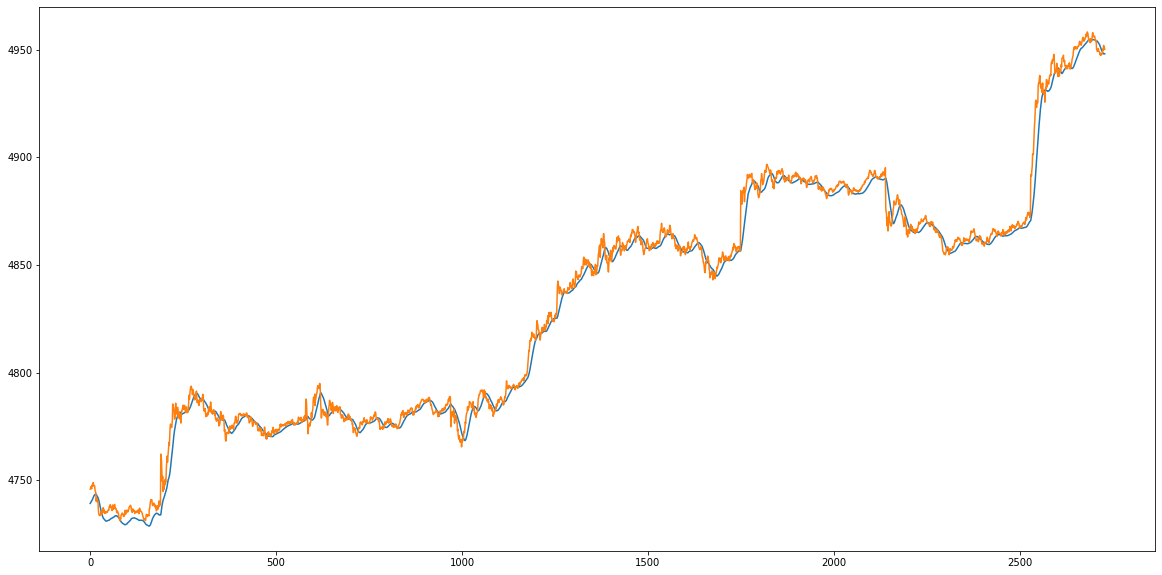

Iter:  1 train:  0.019428752892715485 val:  0.04615000455375858
Saving...
Iter:  2 train:  0.018772122665041125 val:  0.017923148988034533
Saving...
Iter:  3 train:  0.01714146516725432 val:  0.016740924984631447
Saving...
Iter:  4 train:  0.015691342603385946 val:  0.015746946066528086
Iter:  5 train:  0.013833314473111574 val:  0.01697937612447344
Saving...
Iter:  6 train:  0.012683751931558736 val:  0.011613873632939363
Saving...
Iter:  7 train:  0.011439393857980514 val:  0.009167578457532029
Iter:  8 train:  0.010444496773101839 val:  0.01022625666551635
Iter:  9 train:  0.009815890445099148 val:  0.011670758019913416
Saving...
Iter:  10 train:  0.009676028299228385 val:  0.00835417002654609
lr:  0.001
mse:  4.8035235 mae:  1.4068583


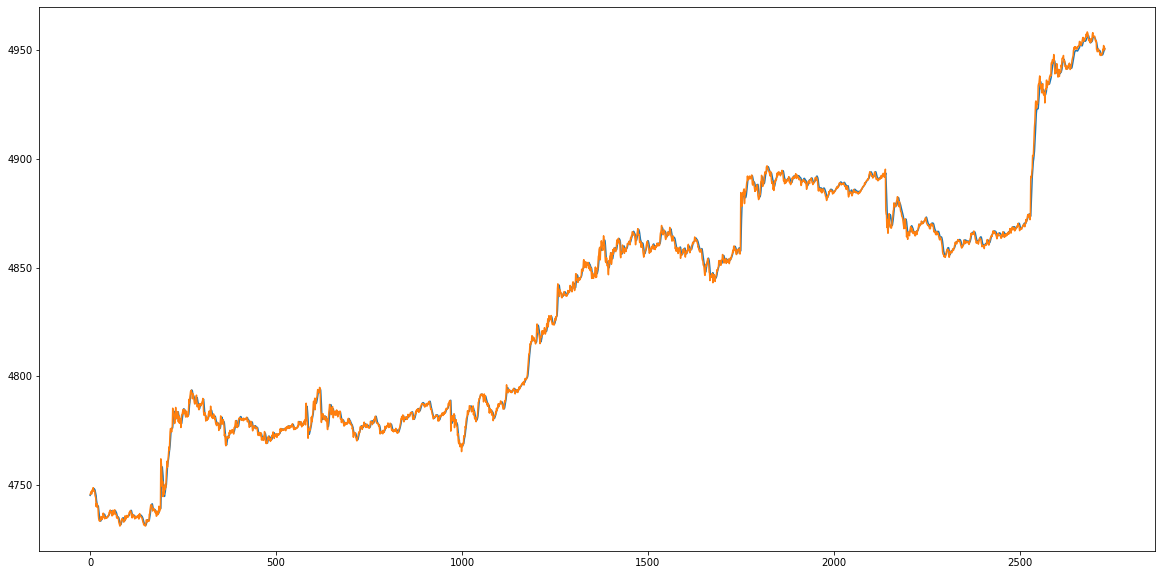

Iter:  11 train:  0.009411202503328867 val:  0.011496944877771765
Saving...
Iter:  12 train:  0.008941529465931566 val:  0.008064995882827868
Iter:  13 train:  0.00904468108687924 val:  0.01233029083105671
Iter:  14 train:  0.008615066772523975 val:  0.008684016005111561
Iter:  15 train:  0.008460263805678143 val:  0.008613163811236125
Iter:  16 train:  0.00830128139892553 val:  0.010491631059700936
Iter:  17 train:  0.008553127182357212 val:  0.008860578574855572
Iter:  18 train:  0.007913460133585517 val:  0.01024349933978065
Saving...
Iter:  19 train:  0.00782834273851774 val:  0.007162321382214576
Iter:  20 train:  0.007434277535617139 val:  0.0071928164880939935
lr:  0.0009000000000000001
mse:  3.5608187 mae:  1.1995264


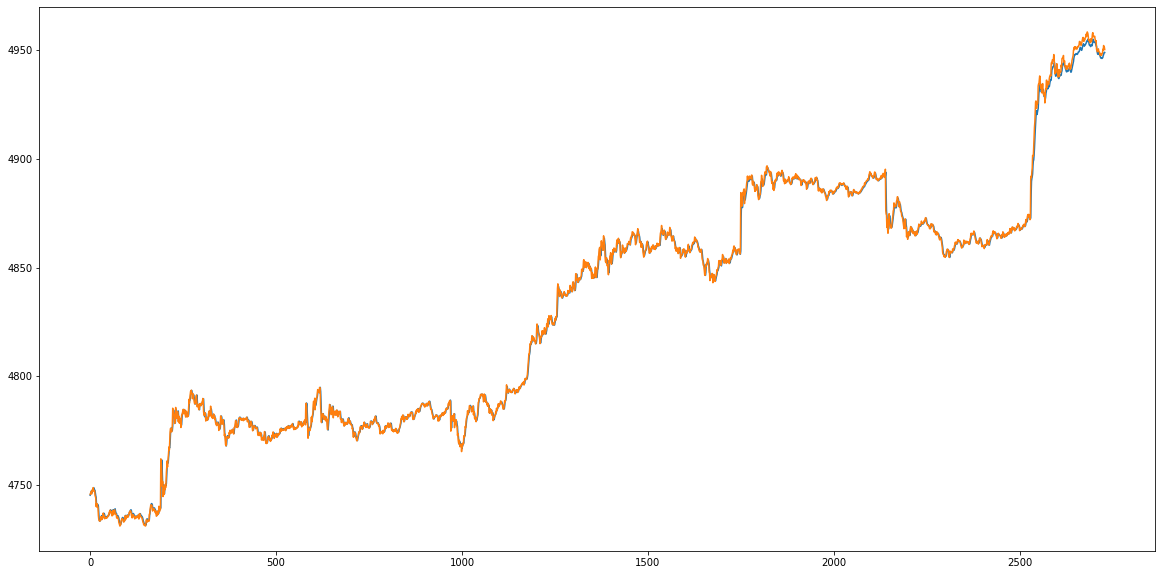

Saving...
Iter:  21 train:  0.007597728031809542 val:  0.007112042359692708
Iter:  22 train:  0.007682188257419256 val:  0.007418887935114564
Iter:  23 train:  0.007563129585151478 val:  0.007669448744290681
Iter:  24 train:  0.00730807211324763 val:  0.007611010657655251
Iter:  25 train:  0.0073109039628197385 val:  0.010140354207838187
Saving...
Iter:  26 train:  0.007157521979925946 val:  0.006768847852918891
Iter:  27 train:  0.007052476391247513 val:  0.0068671141953590914
Saving...
Iter:  28 train:  0.00705585718004613 val:  0.006487483781390988
Saving...
Iter:  29 train:  0.007303008988558284 val:  0.006416752499663534
Iter:  30 train:  0.0071643334904360045 val:  0.006482115047352745
lr:  0.0009000000000000001
mse:  2.8918977 mae:  1.0955402


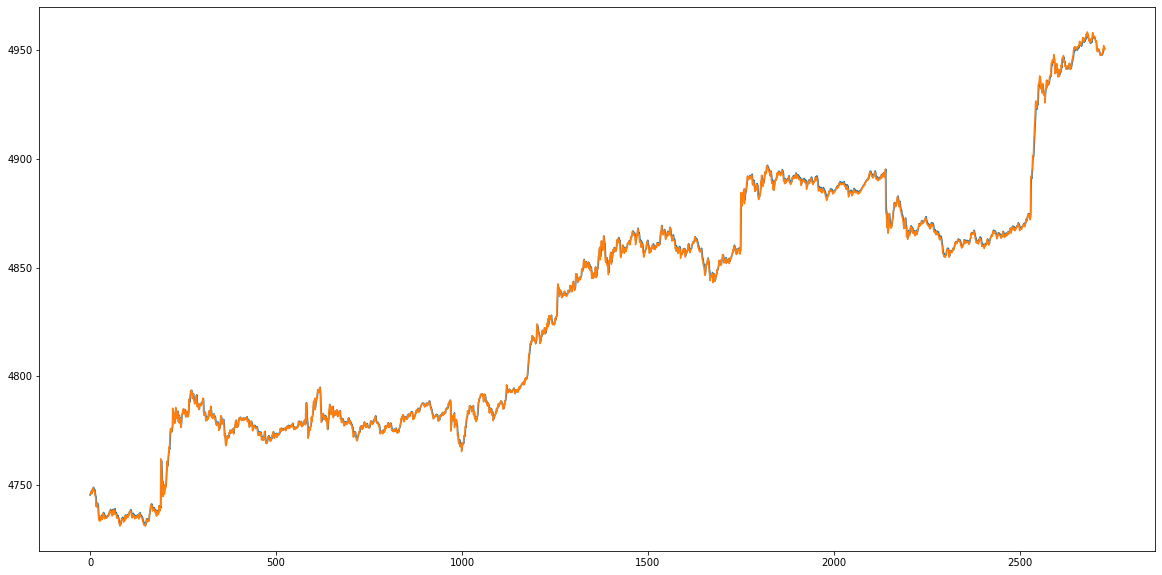

Iter:  31 train:  0.007047579802163401 val:  0.007074773631682072
Iter:  32 train:  0.007098074592064265 val:  0.0067476450592210855
Iter:  33 train:  0.006930555345596301 val:  0.006890855609517865
Iter:  34 train:  0.00693239332769853 val:  0.006497886475999754
Iter:  35 train:  0.007040602225456781 val:  0.007292951339111077
Iter:  36 train:  0.006916715286934714 val:  0.008688392771590413
Iter:  37 train:  0.006858179571308942 val:  0.006620331839131558
Iter:  38 train:  0.006899409239225677 val:  0.006664880291954409
Saving...
Iter:  39 train:  0.006774848169564638 val:  0.0063237985169638045
Iter:  40 train:  0.0068001857876748934 val:  0.007774757975708079
lr:  0.0008100000000000001
mse:  4.160293 mae:  1.4908986


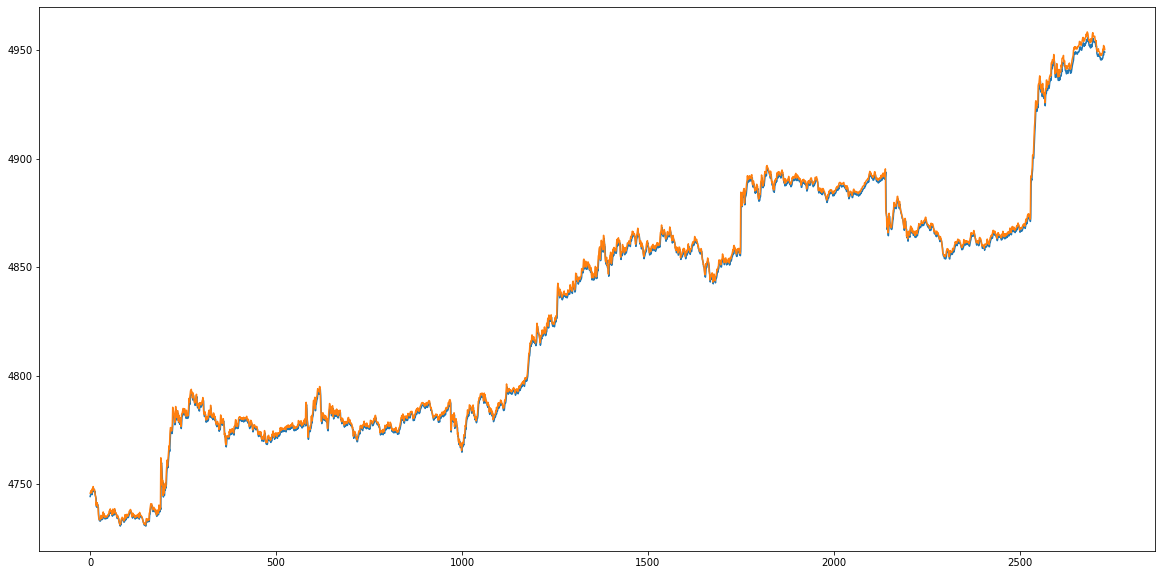

Iter:  41 train:  0.006735577039307137 val:  0.007142093362842471
Iter:  42 train:  0.00676759963591977 val:  0.007859488395504212
Saving...
Iter:  43 train:  0.006781942307320292 val:  0.006270844307069623
Iter:  44 train:  0.006715186158361801 val:  0.0067773984414783335
Iter:  45 train:  0.006770545479072379 val:  0.006474869914653454
Iter:  46 train:  0.006720233337973642 val:  0.006650513162280093
Iter:  47 train:  0.006764427673105006 val:  0.0075156349038857815
Iter:  48 train:  0.0066722068760754144 val:  0.00892587446406686
Iter:  49 train:  0.006854020531495629 val:  0.0065529121602448505
Iter:  50 train:  0.006727823202410079 val:  0.006446411584308557
lr:  0.0008100000000000001
mse:  2.860123 mae:  1.0897132


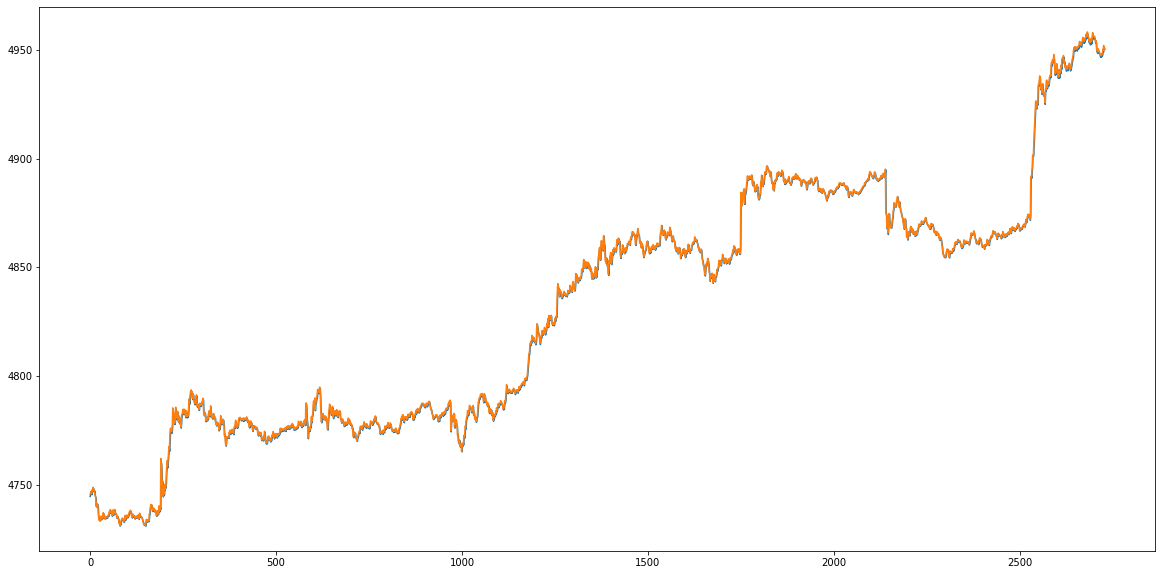

Iter:  51 train:  0.006772450319630835 val:  0.006291552929741285
Iter:  52 train:  0.006687583011212368 val:  0.009353787898566411
Iter:  53 train:  0.006766121919922702 val:  0.006917852870750567
Iter:  54 train:  0.006669156847339451 val:  0.006317614707211277
Iter:  55 train:  0.006613549161612194 val:  0.008343202394627986
Iter:  56 train:  0.006643542626674561 val:  0.006278565515272374
Iter:  57 train:  0.006811309051656184 val:  0.006388197861244871
Saving...
Iter:  58 train:  0.006731617795845533 val:  0.0062115408392099366
Iter:  59 train:  0.0066165468434838375 val:  0.008691924722883345
Iter:  60 train:  0.006705423013274725 val:  0.006738515046207348
lr:  0.000729
mse:  3.1252024 mae:  1.1820173


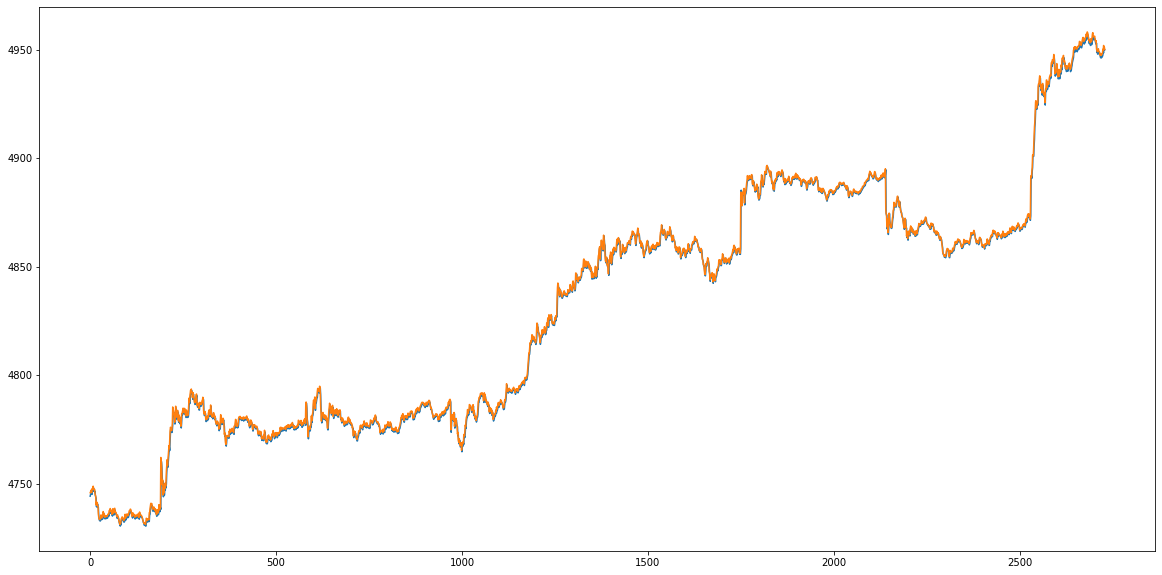

Iter:  61 train:  0.006564383329878296 val:  0.006227191151031107
Saving...
Iter:  62 train:  0.00664801257367238 val:  0.006192472491783752
Iter:  63 train:  0.006613872355160523 val:  0.00710517089692385
Iter:  64 train:  0.0066423752470944186 val:  0.0066719319434662624
Iter:  65 train:  0.006649111301774658 val:  0.007677963363943906
Iter:  66 train:  0.006693536501556058 val:  0.006440767219665753
Iter:  67 train:  0.006583594508946458 val:  0.006231725759519154
Iter:  68 train:  0.006636994009593233 val:  0.006649936735725671
Iter:  69 train:  0.006638703214483168 val:  0.0067125957327843514
Iter:  70 train:  0.006557103549158117 val:  0.0064672393389961945
lr:  0.000729
mse:  2.8786473 mae:  1.0942454


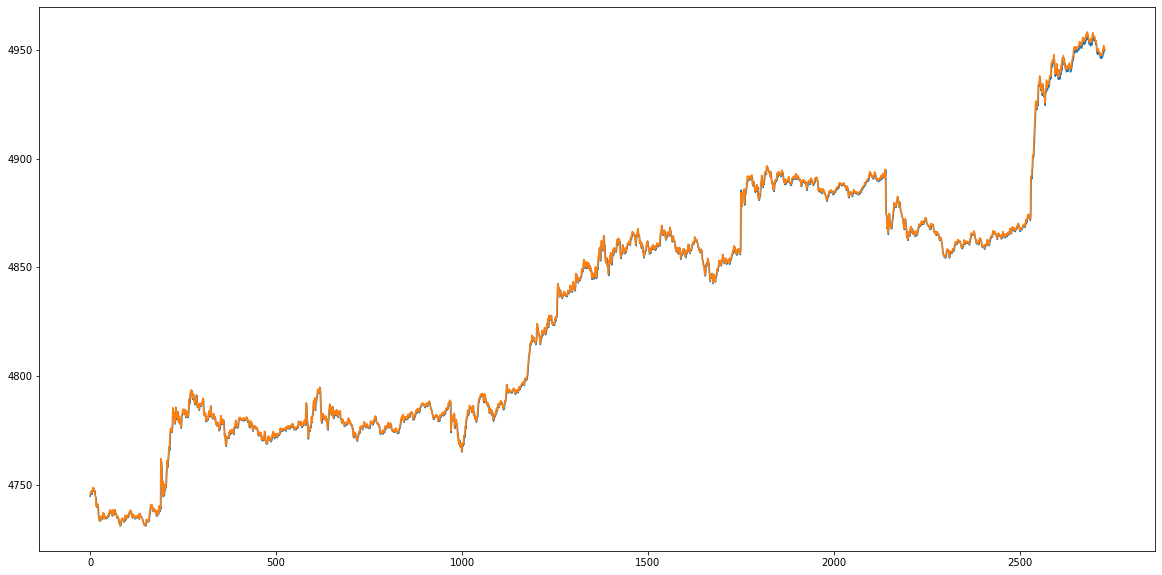

Iter:  71 train:  0.006674284380104541 val:  0.006931933596718113
Iter:  72 train:  0.006601818026036973 val:  0.00688112713820865
Iter:  73 train:  0.0065684443109474 val:  0.007017079939400352
Iter:  74 train:  0.006562412363781907 val:  0.006710616483186583
Saving...
Iter:  75 train:  0.006591951173043737 val:  0.006189978155899267
Iter:  76 train:  0.006549299898606715 val:  0.006223715145317116
Saving...
Iter:  77 train:  0.006622367264193233 val:  0.006184246616433266
Iter:  78 train:  0.0065520904027492844 val:  0.006435202880555544
Iter:  79 train:  0.006612953879676866 val:  0.006241926126339474
Iter:  80 train:  0.0065576042142544465 val:  0.00631822908150575
lr:  0.0006561000000000001
mse:  2.7475307 mae:  1.068496


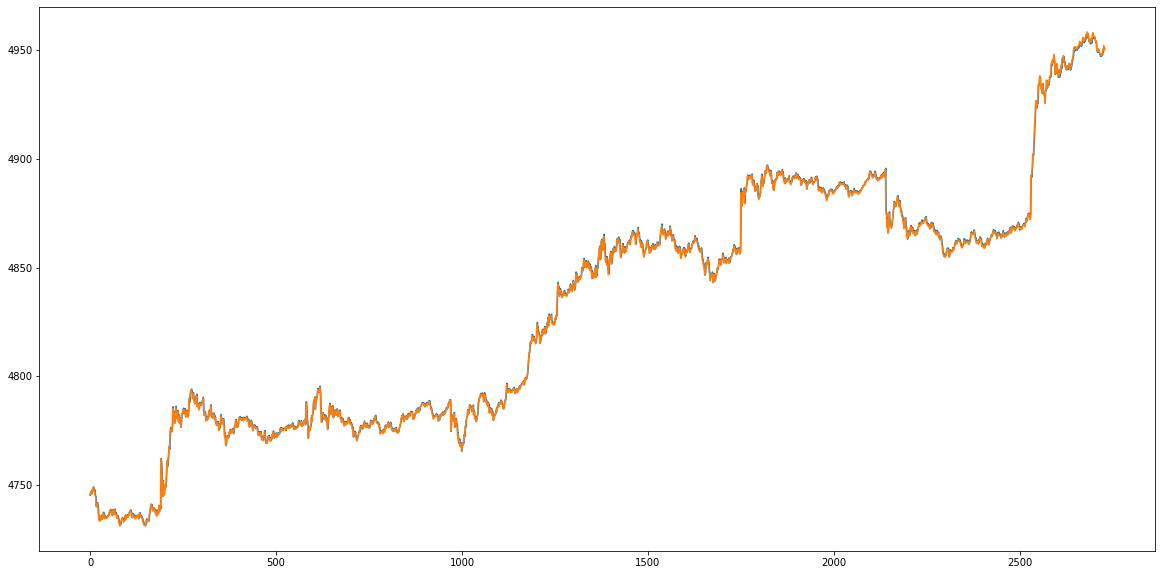

Iter:  81 train:  0.0065698802249221045 val:  0.006254359734444279
Iter:  82 train:  0.0065236783415859555 val:  0.007171528506817724
Iter:  83 train:  0.006570137632692553 val:  0.006734735140428774
Iter:  84 train:  0.006592725869972084 val:  0.006215341216175791
Iter:  85 train:  0.006535880085270242 val:  0.007070317106484721
Iter:  86 train:  0.006630078275980435 val:  0.006419692613977603
Iter:  87 train:  0.006519535132655817 val:  0.006756491516366521
Iter:  88 train:  0.006562835530348786 val:  0.006362922893356167
Iter:  89 train:  0.006545534921823517 val:  0.006512720146391281
Iter:  90 train:  0.006516131172704627 val:  0.006224295994752891
lr:  0.0006561000000000001
mse:  2.6664424 mae:  1.0227661


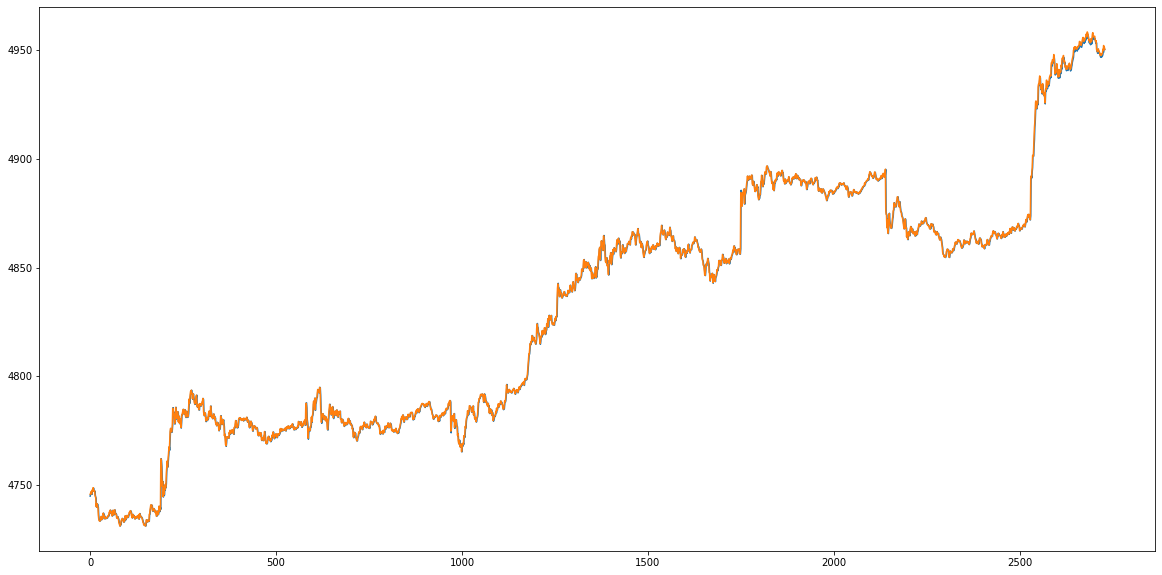

Iter:  91 train:  0.006562128002016515 val:  0.006207714417866364
Iter:  92 train:  0.0066218526258650596 val:  0.0064284202197338975
Iter:  93 train:  0.006627030641232675 val:  0.006503309543529726
Iter:  94 train:  0.006557821895376415 val:  0.006215636160240276
Iter:  95 train:  0.0065448505646681756 val:  0.006362685717812343
Saving...
Iter:  96 train:  0.006578096574590794 val:  0.0061834108617226735
Iter:  97 train:  0.006556048101032768 val:  0.007249018918044232
Saving...
Iter:  98 train:  0.0065764455115947355 val:  0.00616944478255148
Iter:  99 train:  0.0065196431863318765 val:  0.006457494963401667
Iter:  100 train:  0.006524786515650803 val:  0.006198468867287581
lr:  0.00059049
mse:  2.6443455 mae:  1.018398


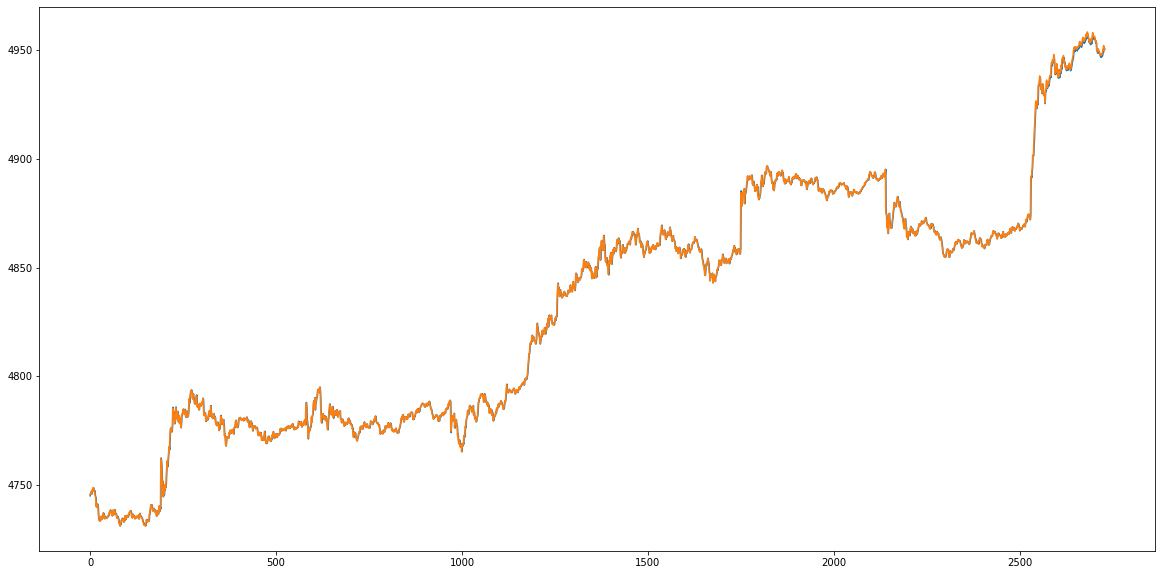

Iter:  101 train:  0.006524706557402336 val:  0.006287598121291413
Iter:  102 train:  0.006523291675608464 val:  0.006543645412557218
Iter:  103 train:  0.00655546032978661 val:  0.006931941207580545
Iter:  104 train:  0.006514685218710821 val:  0.006175230567731712
Iter:  105 train:  0.0065206840749557704 val:  0.006341137079899048
Iter:  106 train:  0.006496319112262918 val:  0.006285140410715853
Iter:  107 train:  0.006560439162389551 val:  0.0066609060686070535
Iter:  108 train:  0.0065162548325105344 val:  0.006250897874046602
Iter:  109 train:  0.006509820551663041 val:  0.006472902099412196
Iter:  110 train:  0.006505079843953006 val:  0.007929907992009256
lr:  0.00059049
mse:  4.328017 mae:  1.588498


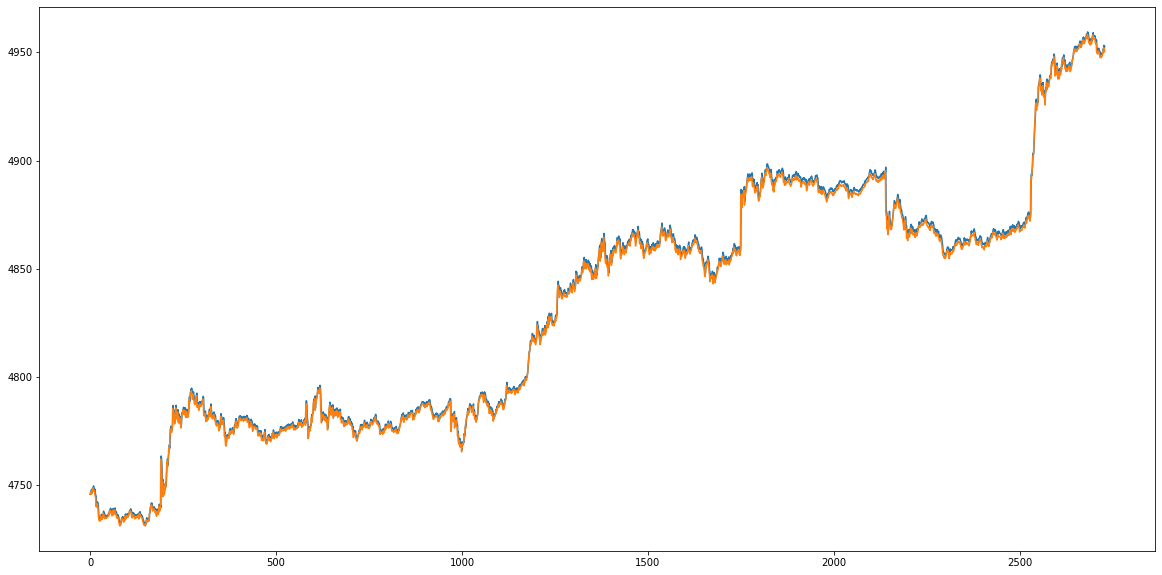

Iter:  111 train:  0.00656083100461961 val:  0.006172097994301574
Iter:  112 train:  0.006522360061983176 val:  0.006366908116933885
Iter:  113 train:  0.006489256131948792 val:  0.006339208808571484
Iter:  114 train:  0.006587960636679632 val:  0.006404949982615744
Iter:  115 train:  0.006489878911102044 val:  0.008634662973887947
Iter:  116 train:  0.006549263060499016 val:  0.006233547204774554
Iter:  117 train:  0.006489682536033395 val:  0.006352252199227304
Iter:  118 train:  0.006588756328569948 val:  0.006192067266352438
Iter:  119 train:  0.006472298828212392 val:  0.006591093005704684
Iter:  120 train:  0.006473186196468853 val:  0.006367933095977051
lr:  0.000531441
mse:  2.7909284 mae:  1.0851711


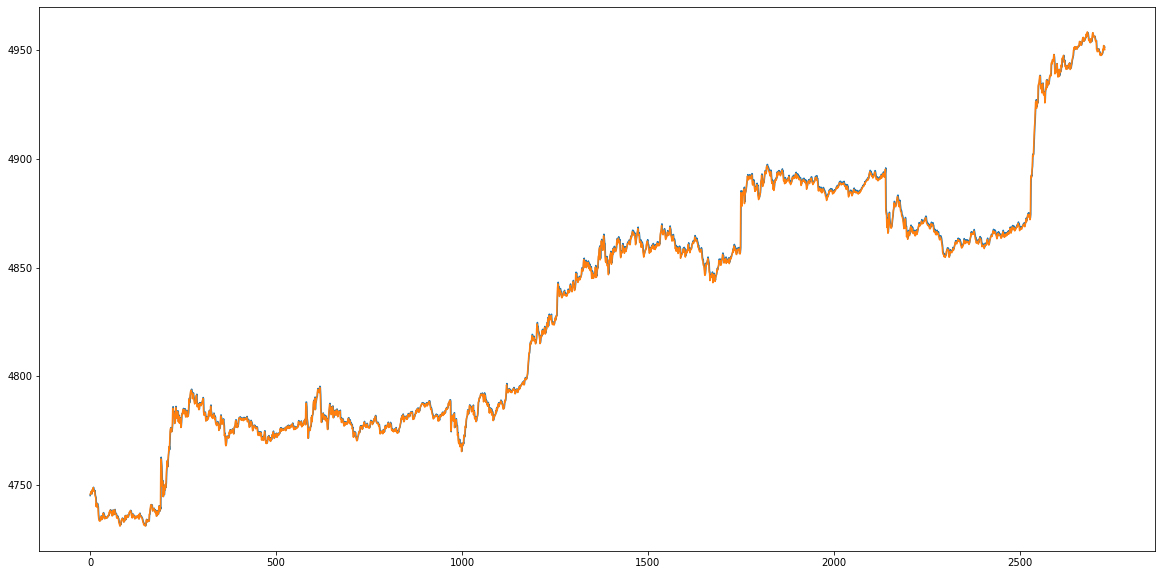

Iter:  121 train:  0.006531008483570323 val:  0.0065325793281067026
Iter:  122 train:  0.006478740843434086 val:  0.006631396036007637
Iter:  123 train:  0.006517698078231248 val:  0.00646903645620461
Iter:  124 train:  0.0064939261098364755 val:  0.0062129633521495
Iter:  125 train:  0.00653497311510922 val:  0.006266169294966127
Iter:  126 train:  0.006515589465049575 val:  0.00640279575670365
Iter:  127 train:  0.00647627324926534 val:  0.006781754914006871
Iter:  128 train:  0.0065193140685928476 val:  0.0063417737746631845
Saving...
Iter:  129 train:  0.006505531775747354 val:  0.0061620093635601945
Iter:  130 train:  0.006544764776209548 val:  0.006177611342585312
lr:  0.000531441
mse:  2.6265733 mae:  1.018897


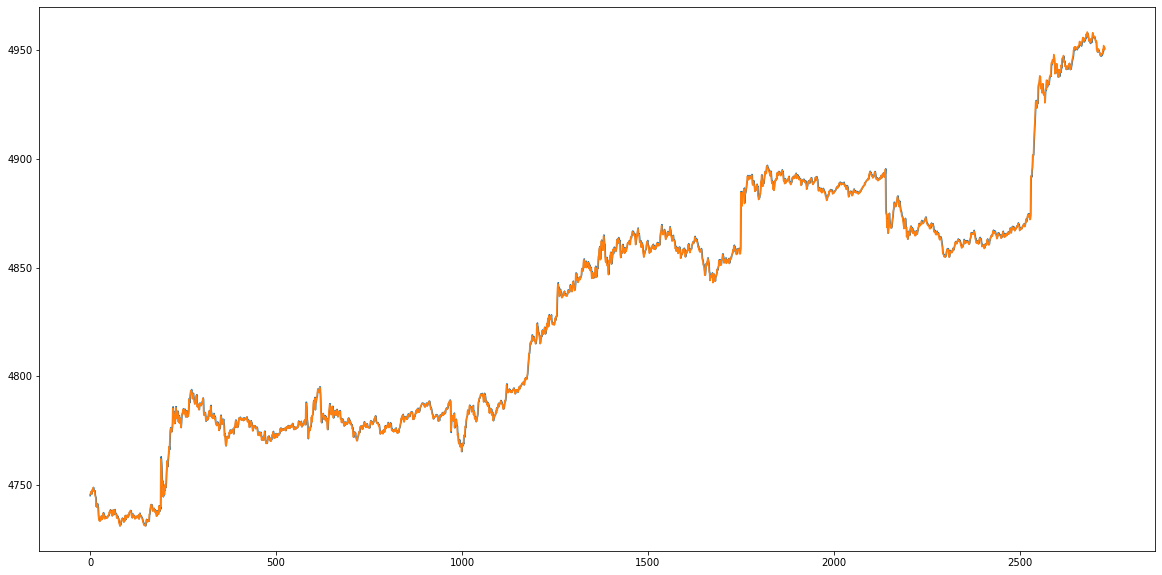

Iter:  131 train:  0.00654432240869528 val:  0.00728764397365257
Iter:  132 train:  0.0065096124981253375 val:  0.006198666019998809
Iter:  133 train:  0.006552520591055892 val:  0.0061767782955704145
Iter:  134 train:  0.006500505336614616 val:  0.006847188660142858
Iter:  135 train:  0.006499226926533934 val:  0.00640712303786555
Iter:  136 train:  0.006506783040625077 val:  0.006180193884303333
Iter:  137 train:  0.006520734666570125 val:  0.006264016532841264
Iter:  138 train:  0.006480517493407418 val:  0.006191474161643432
Iter:  139 train:  0.006507835002637976 val:  0.006199237492183712
Iter:  140 train:  0.006507954269400942 val:  0.006213389033395046
lr:  0.0004782969
mse:  2.6571057 mae:  1.031832


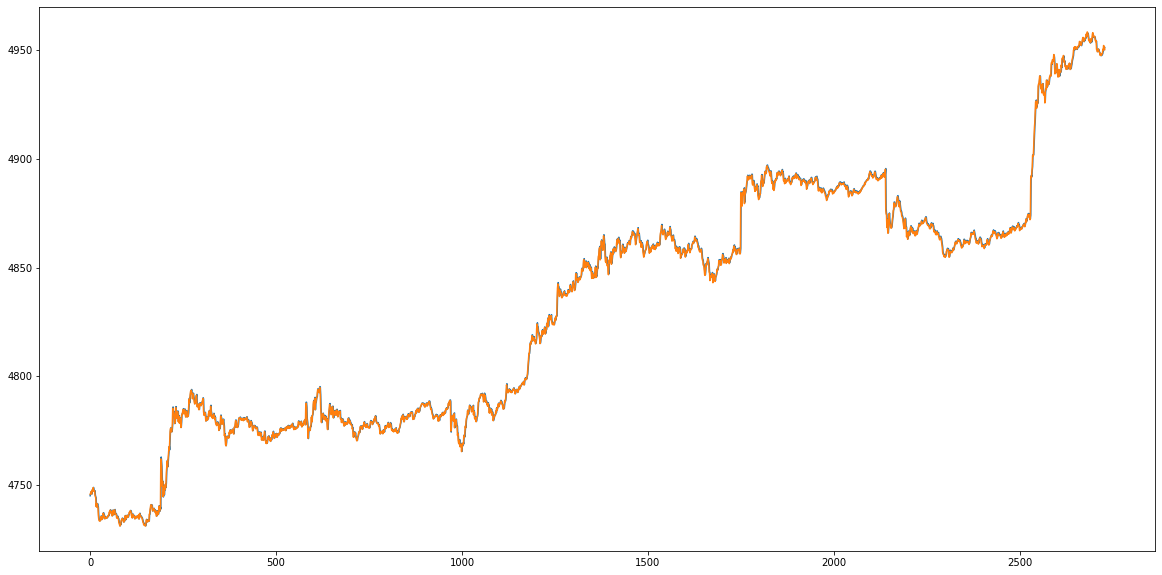

Iter:  141 train:  0.00647996763603981 val:  0.006222016761285877
Iter:  142 train:  0.006526382710972001 val:  0.006313966181224973
Iter:  143 train:  0.006450673684766161 val:  0.006212860081590447
Iter:  144 train:  0.006475410408941433 val:  0.006683764241144053
Iter:  145 train:  0.006502027610720833 val:  0.006500392262973205
Iter:  146 train:  0.006511059665869103 val:  0.006393113405078064
Iter:  147 train:  0.006485723237037088 val:  0.0061700643379838955
Iter:  148 train:  0.006526967284314728 val:  0.0061754077495227025
Iter:  149 train:  0.006507128208769301 val:  0.00618821502748359
Iter:  150 train:  0.006505431124475174 val:  0.006164764174095864
lr:  0.0004782969
mse:  2.6156685 mae:  1.0126052


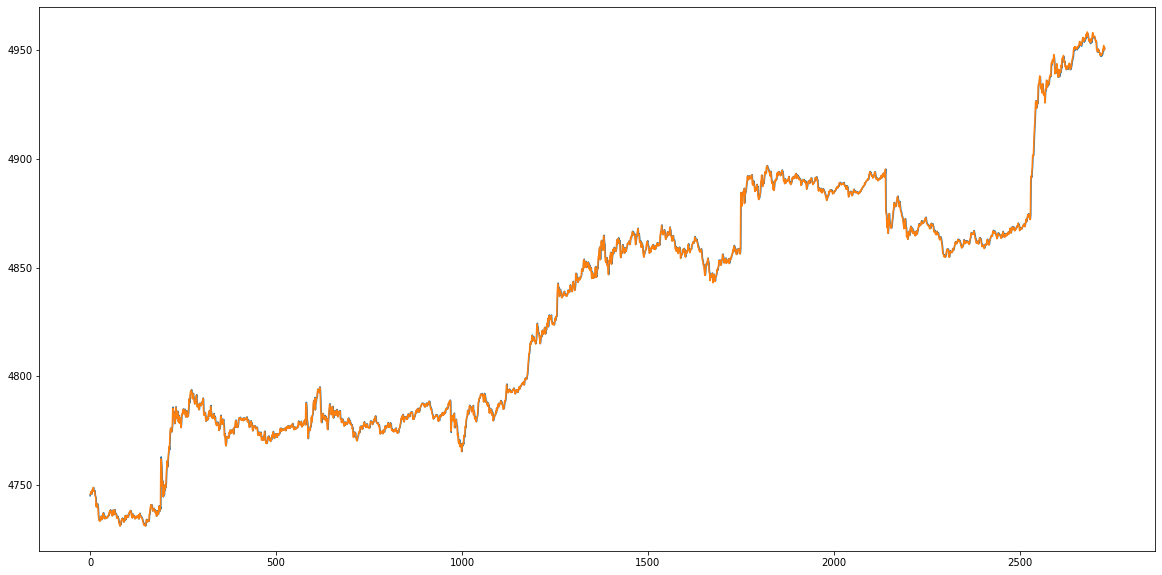

Iter:  151 train:  0.006495892012338932 val:  0.006408790659223235
Iter:  152 train:  0.006498275746603013 val:  0.006329087142103393
Iter:  153 train:  0.006533174938149558 val:  0.006409953644902517
Iter:  154 train:  0.0065238869324516545 val:  0.006554140544832276
Iter:  155 train:  0.006488251458330898 val:  0.006319150038541178
Iter:  156 train:  0.006455656035036966 val:  0.006478938064655617
Iter:  157 train:  0.006468284861931295 val:  0.006626012659360438
Iter:  158 train:  0.006516266609394359 val:  0.0072564391144525715
Iter:  159 train:  0.0064912304208013605 val:  0.006244904364997635
Iter:  160 train:  0.006464382490676079 val:  0.006289854818477504
lr:  0.00043046721
mse:  2.7228906 mae:  1.0418367


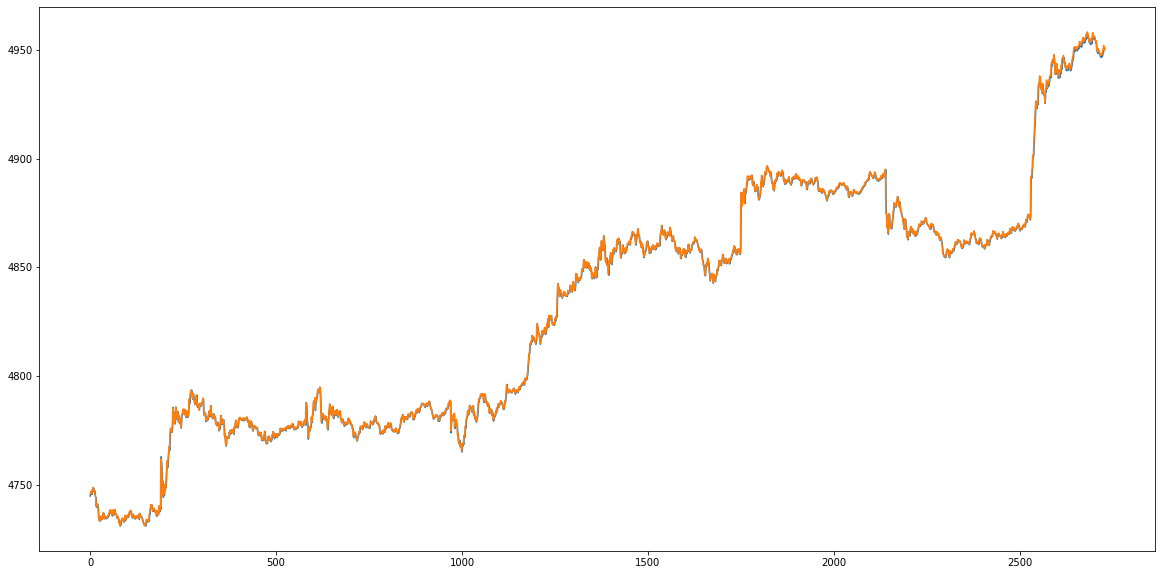

Iter:  161 train:  0.006502902519216848 val:  0.006265494792696146
Iter:  162 train:  0.006473513466776194 val:  0.006247478056717945
Iter:  163 train:  0.0064694990184640195 val:  0.0061803707103427995


In [26]:
epochs = 1000
loss = nn.MSELoss()
patience = 35
min_val_loss = 9999
counter = 0
for i in range(epochs):
    mse_train = 0
    for batch_x, batch_y in data_train_loader:
        batch_x = batch_x.cuda()
        batch_y = batch_y.cuda()
        opt.zero_grad()
        y_pred, alphas, betas = model(batch_x)
        y_pred = y_pred.squeeze(1)
        l = loss(y_pred, batch_y)
        l.backward()
        mse_train += l.item()*batch_x.shape[0]
        opt.step()
    epoch_scheduler.step()
    with torch.no_grad():
        mse_val = 0
        preds = []
        true = []
        for batch_x, batch_y in data_val_loader:
            batch_x = batch_x.cuda()
            batch_y = batch_y.cuda()
            output, alphas, betas = model(batch_x)
            output = output.squeeze(1)
            preds.append(output.detach().cpu().numpy())
            true.append(batch_y.detach().cpu().numpy())
            mse_val += loss(output, batch_y).item()*batch_x.shape[0]
    preds = np.concatenate(preds)
    true = np.concatenate(true)
    
    if min_val_loss > mse_val**0.5:
        min_val_loss = mse_val**0.5
        print("Saving...")
        torch.save(model.state_dict(), "imv_tensor_lstm_nasdaq.pt")
        counter = 0
    else: 
        counter += 1
    
    if counter == patience:
        break
    print("Iter: ", i, "train: ", (mse_train/len(X_train_t))**0.5, "val: ", (mse_val/len(X_val_t))**0.5)
    if(i % 10 == 0):
        preds = preds*(target_train_max - target_train_min) + target_train_min
        true = true*(target_train_max - target_train_min) + target_train_min
        mse = mean_squared_error(true, preds)
        mae = mean_absolute_error(true, preds)
        print("lr: ", opt.param_groups[0]["lr"])
        print("mse: ", mse, "mae: ", mae)
        plt.figure(figsize=(20, 10))
        plt.plot(preds)
        plt.plot(true)
        plt.show()

In [29]:
model.load_state_dict(torch.load("imv_tensor_lstm_nasdaq.pt"))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [32]:
with torch.no_grad():
    mse_val = 0
    preds = []
    true = []
    alphas = []
    betas = []
    for batch_x, batch_y in data_test_loader:
        batch_x = batch_x.cuda()
        batch_y = batch_y.cuda()
        output, a, b = model(batch_x)
        output = output.squeeze(1)
        preds.append(output.detach().cpu().numpy())
        true.append(batch_y.detach().cpu().numpy())
        alphas.append(a.detach().cpu().numpy())
        betas.append(b.detach().cpu().numpy())
        mse_val += loss(output, batch_y).item()*batch_x.shape[0]
preds = np.concatenate(preds)
true = np.concatenate(true)

In [33]:
preds = preds*(target_train_max - target_train_min) + target_train_min
true = true*(target_train_max - target_train_min) + target_train_min

In [34]:
mse = mean_squared_error(true, preds)
mae = mean_absolute_error(true, preds)

In [35]:
mse, mae

(2.1215408, 0.9473822)

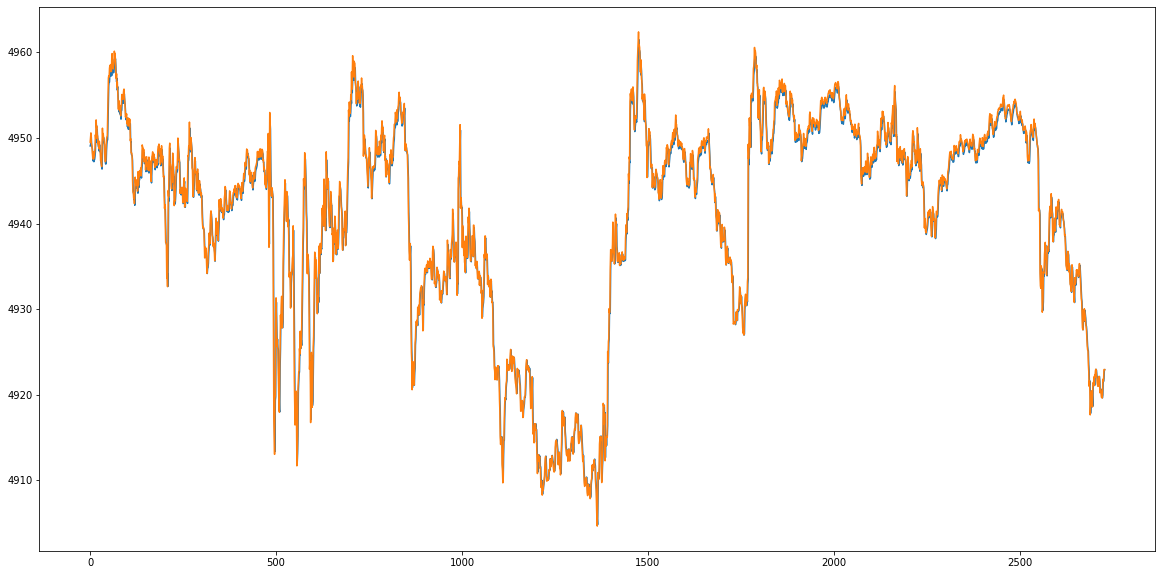

In [36]:
plt.figure(figsize=(20, 10))
plt.plot(preds)
plt.plot(true)
plt.show()

In [38]:
alphas = np.concatenate(alphas)
betas = np.concatenate(betas)

In [39]:
alphas = alphas.mean(axis=0)
betas = betas.mean(axis=0)

In [40]:
alphas = alphas[..., 0]
betas = betas[..., 0]

In [42]:
alphas = alphas.transpose(1, 0)

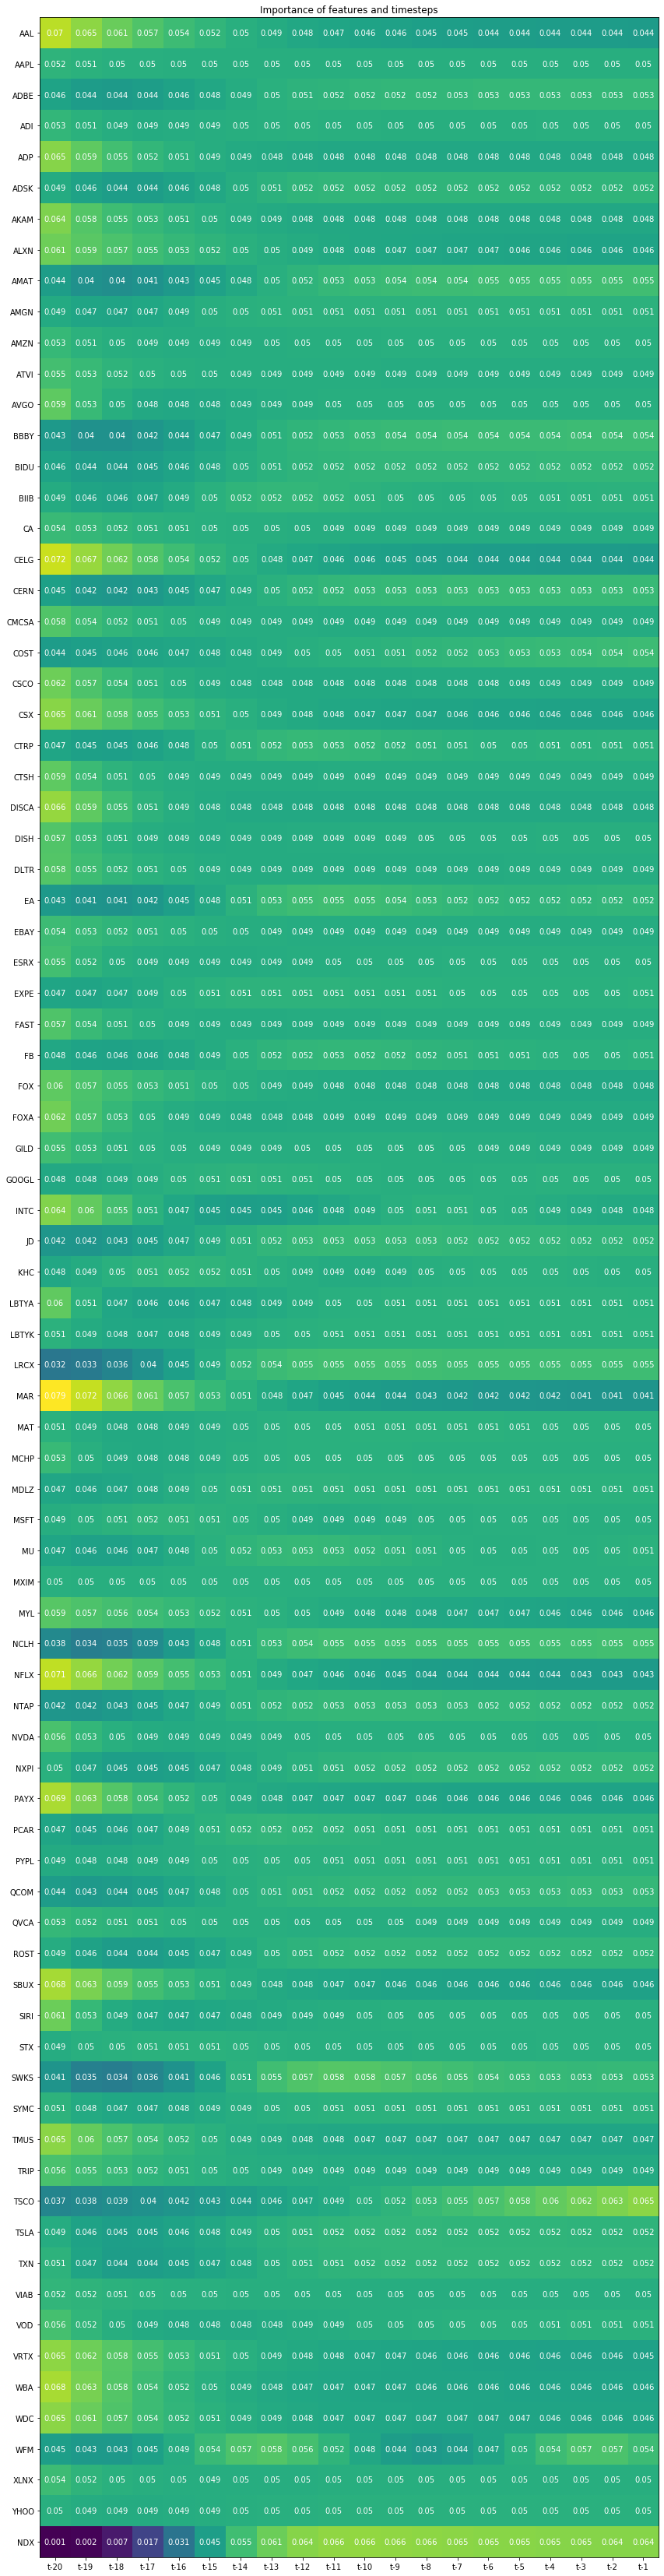

In [53]:
fig, ax = plt.subplots(figsize=(60, 60))
im = ax.imshow(alphas)
ax.set_xticks(np.arange(X_train_t.shape[1]))
ax.set_yticks(np.arange(len(data.columns)))
ax.set_xticklabels(["t-"+str(i) for i in np.arange(X_train_t.shape[1], -1, -1)])
ax.set_yticklabels(list(data.columns))
for i in range(len(data.columns)):
    for j in range(X_train_t.shape[1]):
        text = ax.text(j, i, round(alphas[i, j], 3),
                       ha="center", va="center", color="w")
ax.set_title("Importance of features and timesteps")
#fig.tight_layout()
plt.show()

([<matplotlib.axis.XTick at 0x7f8a22c06160>,
 <a list of 82 Text xticklabel objects>)

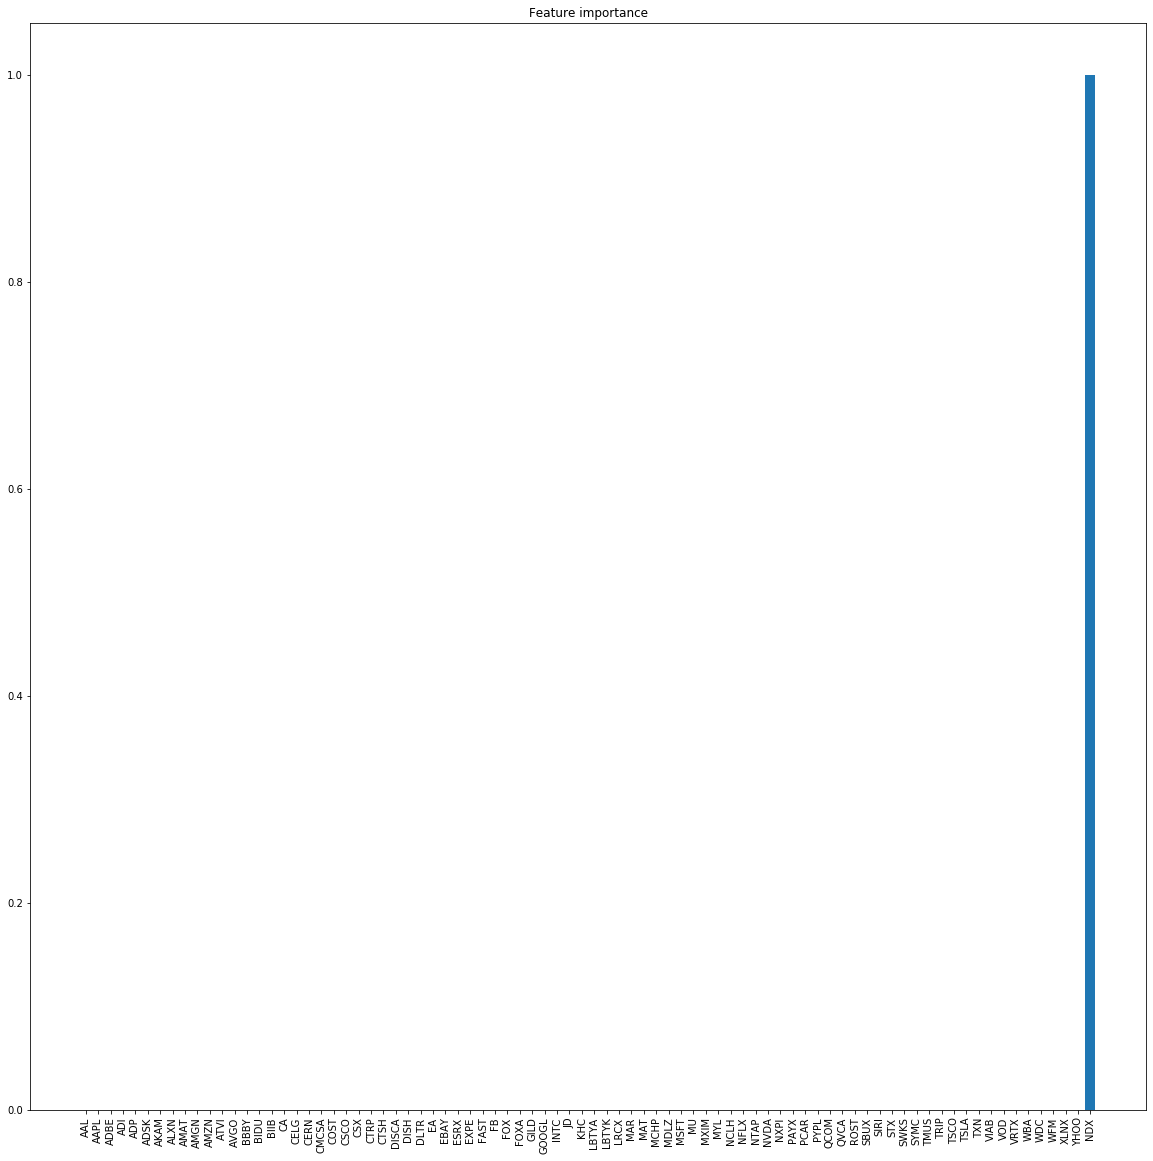

In [50]:
plt.figure(figsize=(20, 20))
plt.title("Feature importance")
plt.bar(range(len(data.columns)), betas)
plt.xticks(ticks=range(len(data.columns)), labels=list(data.columns), rotation=90)